## Download MNIST data


In [8]:
import os
import urllib
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

#dataset_dir = os.path.dirname(__file__)
dataset_dir = './'

In [9]:
for v in key_file.values():
    url = url_base + v
    file_path = dataset_dir + v
    print("Downloading " + v + " ... " + file_path)
    urllib.urlretrieve(url,file_path)
    #urllib.request.urlretrieve(url_base + file_name, file_path)
print("Done")

Done


### pickle形式で保存

In [19]:
import gzip
import pickle
import numpy as np

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784

save_file = dataset_dir + "mnist.pkl"

dataset = {}
for key, value in key_file.iteritems():
    file_path = dataset_dir + value
    print("Converting " + file_path + " to NumPy Array ...")

    if key.count('img'):
        with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
            data = data.reshape(-1, img_size)
    elif key.count('label'):
        with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
    dataset[key] = data

print("Creating pickle file ..." + save_file)
with open(save_file, 'wb') as f:
    pickle.dump(dataset, f, -1)


Converting ./t10k-images-idx3-ubyte.gz to NumPy Array ...
Converting ./t10k-labels-idx1-ubyte.gz to NumPy Array ...
Converting ./train-images-idx3-ubyte.gz to NumPy Array ...
Converting ./train-labels-idx1-ubyte.gz to NumPy Array ...
Creating pickle file ..../mnist.pkl


### Pickleデータから読み込み

In [21]:
with open(save_file, 'rb') as f:
    dataset = pickle.load(f)

x_train = dataset['train_img']
t_train = dataset['train_label']
x_test  = dataset['test_img']
t_test  = dataset['test_label']

print ('x_train.shape:{}'.format(x_train.shape))
print ('t_train.shape:{}'.format(t_train.shape))
print ('x_test.shape:{}'.format(x_test.shape))
print ('t_test.shape:{}'.format(t_test.shape))

x_train.shape:(60000, 784)
t_train.shape:(60000,)
x_test.shape:(10000, 784)
t_test.shape:(10000,)


In [22]:
# 0.0〜1.0の値に正規化する
def normalize(dataset): #expect: dataset['train_img'], dataset['test_img']):
    dataset = dataset.astype(np.float32)
    dataset /= 255.0
    return dataset

# ラベルをone-hot表現とする（正解ラベルのIndexだけが1で他がゼロ）
def one_hot_label(dataset): #expect: dataset['train_label'], dataset['test_label']):
    T = np.zeros((dataset.size, 10)) # 10 class 
    for idx, row in enumerate(T):
        row[dataset[idx]] = 1 # 対象クラスのインデックス番号の値を1(他は0)
    return T


### データの表示

In [27]:
#import sys, os
#import numpy as np
#from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def img_show(img):
    #pil_img = Image.fromarray(np.uint8(img))
    #pil_img.show()
    plt.imshow(img)
    plt.gray()
    plt.show()

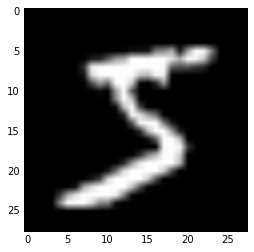

In [28]:
img = x_train[0]
label = t_train[0]

img = img.reshape(28,28) # grayscale
img_show(img)